In [3]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df= pd.read_csv('covid_19_clean_complete.csv')
#importing dataset

In [6]:
df.head(5)

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [9]:
df.drop(columns=['Province/State'], inplace=True)
df.head(5)

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country/Region  49068 non-null  object 
 1   Lat             49068 non-null  float64
 2   Long            49068 non-null  float64
 3   Date            49068 non-null  object 
 4   Confirmed       49068 non-null  int64  
 5   Deaths          49068 non-null  int64  
 6   Recovered       49068 non-null  int64  
 7   Active          49068 non-null  int64  
 8   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


In [13]:
df.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
std,24.950320,70.442740,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04
min,-51.796300,-135.000000,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06


EDA [EXPLORATORY DATA ANALYSIS]

C:\Users\DELL\AppData\Local\Temp\ipykernel_3144\3794295157.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data_by_region, x='WHO Region', y='Confirmed', palette='Set2')


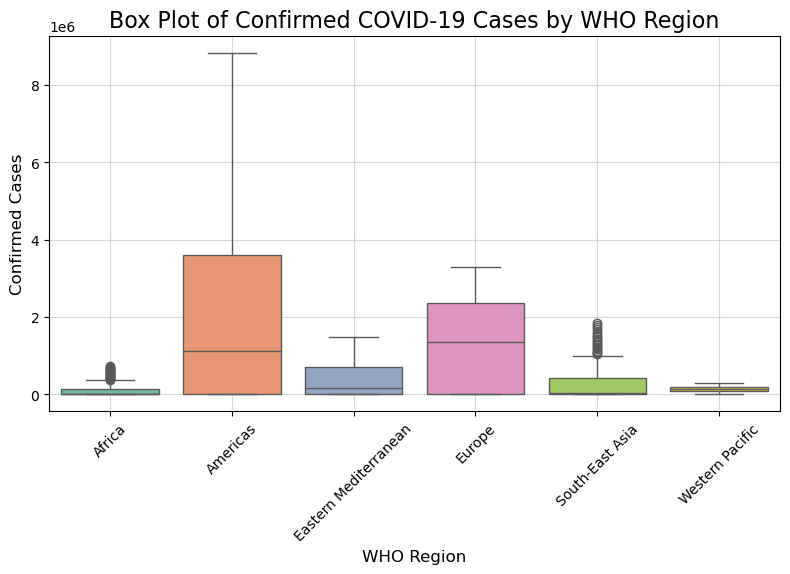

In [44]:

# Group data by WHO Region and sum confirmed cases
data_by_region = df.groupby(['WHO Region', 'Date'])['Confirmed'].sum().reset_index()

# Plot the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=data_by_region, x='WHO Region', y='Confirmed', palette='Set2')

# Customize the plot
plt.title('Box Plot of Confirmed COVID-19 Cases by WHO Region', fontsize=16)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()

# Show the plot
plt.show()


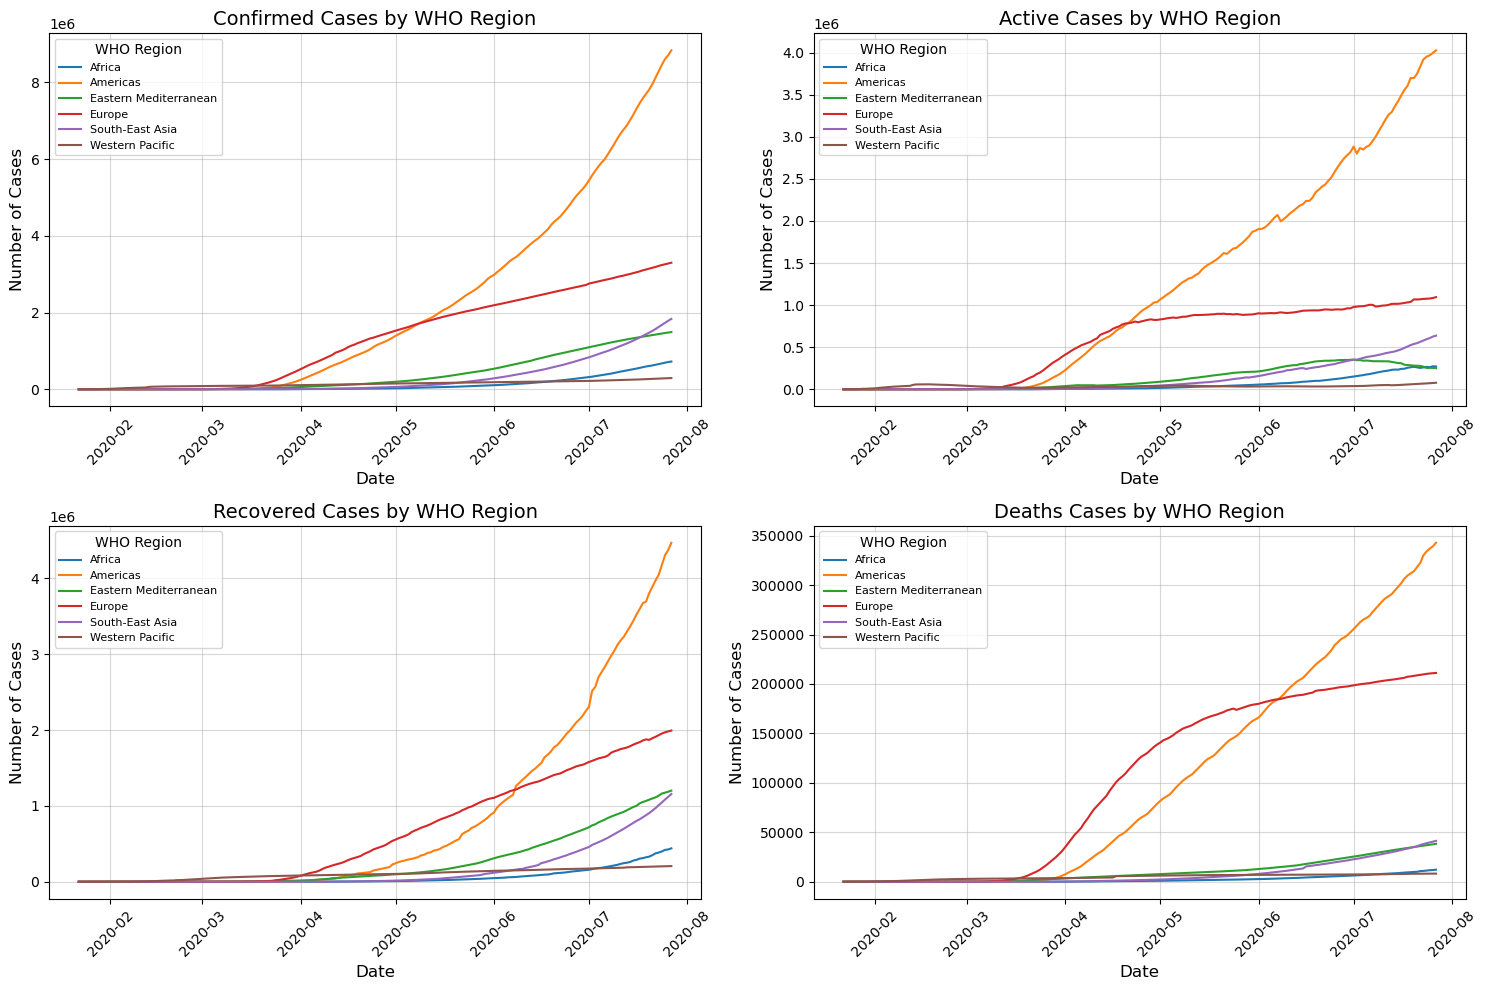

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('covid_19_clean_complete.csv')

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Group data by 'WHO Region' and 'Date' and sum up the cases
data_by_region_date = df.groupby(['WHO Region', 'Date'])[['Confirmed', 'Active', 'Recovered', 'Deaths']].sum().reset_index()

# Plot the data for each WHO Region
regions = data_by_region_date['WHO Region'].unique()
case_types = ['Confirmed', 'Active', 'Recovered', 'Deaths']

# Set up the plot
plt.figure(figsize=(15, 10))

for case_type in case_types:
    plt.subplot(2, 2, case_types.index(case_type) + 1)  # Create subplots for each case type
    for region in regions:
        region_data = data_by_region_date[data_by_region_date['WHO Region'] == region]
        plt.plot(region_data['Date'], region_data[case_type], label=region)
    
    # Customize each subplot
    plt.title(f'{case_type} Cases by WHO Region', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.legend(title='WHO Region', fontsize=8, loc='upper left')
    plt.grid(alpha=0.5)
    plt.xticks(rotation=45)

# Adjust layout
plt.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')  # Save as a PNG file
plt.show()


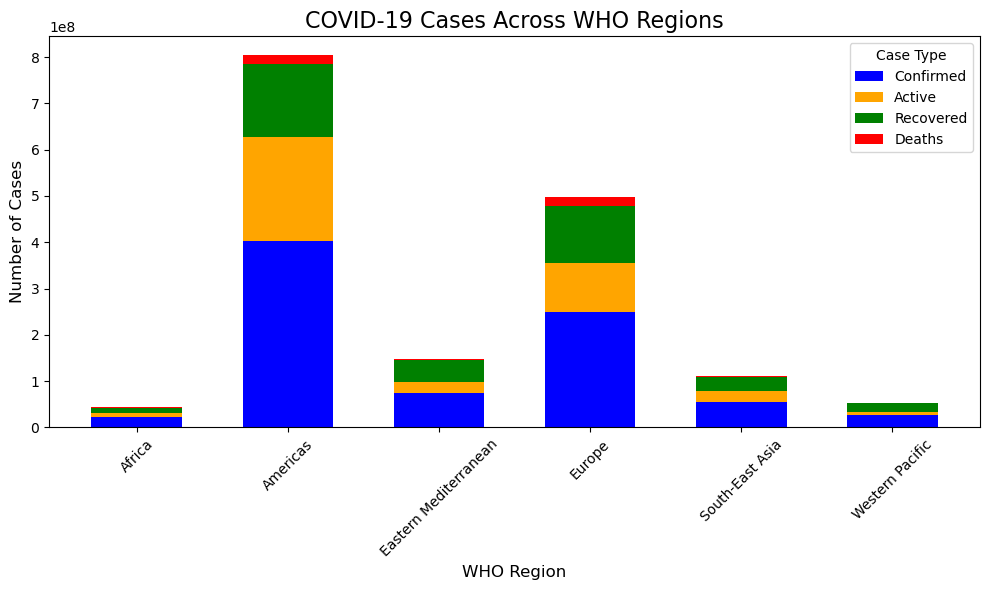

In [46]:


# Group data by WHO Region and sum up the cases
data_by_region = df.groupby('WHO Region')[['Confirmed', 'Active', 'Recovered', 'Deaths']].sum()

# Define categories and regions
categories = ['Confirmed', 'Active', 'Recovered', 'Deaths']
regions = data_by_region.index

# Extract data for plotting
confirmed = data_by_region['Confirmed']
active = data_by_region['Active']
recovered = data_by_region['Recovered']
deaths = data_by_region['Deaths']

# Create a stacked bar chart
bar_width = 0.6
x = np.arange(len(regions))

plt.figure(figsize=(10, 6))
plt.bar(x, confirmed, width=bar_width, label='Confirmed', color='blue')
plt.bar(x, active, width=bar_width, label='Active', color='orange', bottom=confirmed)
plt.bar(x, recovered, width=bar_width, label='Recovered', color='green', bottom=confirmed + active)
plt.bar(x, deaths, width=bar_width, label='Deaths', color='red', bottom=confirmed + active + recovered)

# Customize the plot
plt.title('COVID-19 Cases Across WHO Regions', fontsize=16)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(x, regions, rotation=45, fontsize=10)
plt.legend(title='Case Type', fontsize=10)
plt.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')  # Save as a PNG fi

# Show the plot
plt.show()


In [19]:
''' we can clearly see that the countries in the Americas region collectively , when we look at the region as a whole  had the highest number of confirmed cases , active , recovered and death cases when compared to the others and regions as Africa and Western pacific had the least amount of cases in all areas(confirmed, active, recovered,death) . the Western pacific region had more cases of covid 19 based on this data , had a lesser number of active cases , a higher number of recovered victims  which shows they were able to manage the virus well enough within their region'''

' we can clearly see that the countries in the Americas region collectively , when we look at the region as a whole  had the highest number of confirmed cases , active , recovered and death cases when compared to the others and regions as Africa and Western pacific had the least amount of cases in all areas(confirmed, active, recovered,death) . the Western pacific region had more cases of covid 19 based on this data , had a lesser number of active cases , a higher number of recovered victims  which shows they were able to manage the virus well enough within their region'

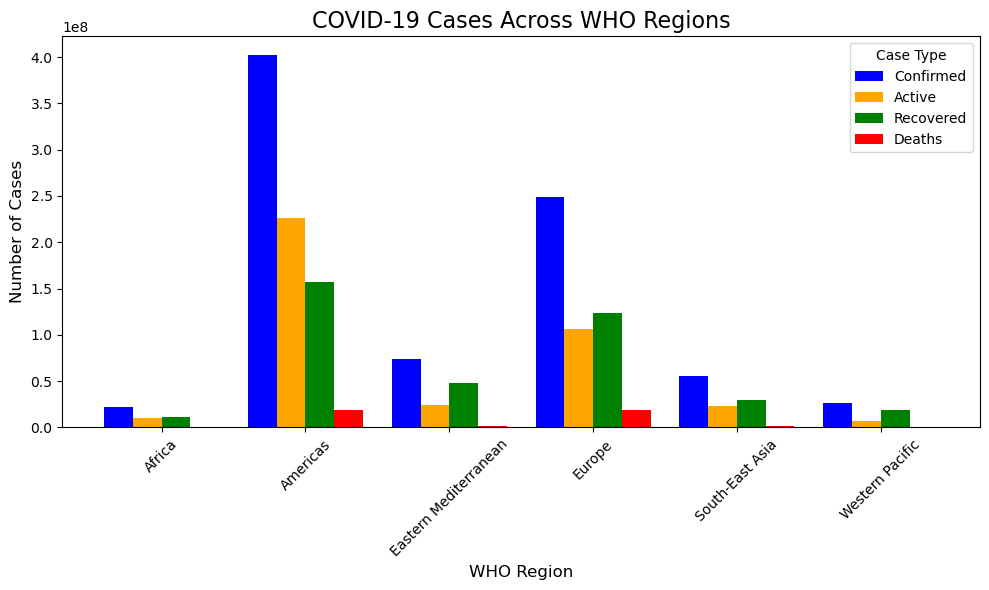

In [60]:

# Group data by WHO Region and sum up the cases
data_by_region = df.groupby('WHO Region')[['Confirmed', 'Active', 'Recovered', 'Deaths']].sum()

# Define categories and regions
categories = ['Confirmed', 'Active', 'Recovered', 'Deaths']
regions = data_by_region.index

# Extract data for plotting
confirmed = data_by_region['Confirmed']
active = data_by_region['Active']
recovered = data_by_region['Recovered']
deaths = data_by_region['Deaths']

# Set up positions for the bars
bar_width = 0.2
x = np.arange(len(regions))  # The x locations for the groups

# Create a multiple bar chart
plt.figure(figsize=(10,6))
plt.bar(x - 1.5 * bar_width, confirmed, width=bar_width, label='Confirmed', color='blue')
plt.bar(x - 0.5 * bar_width, active, width=bar_width, label='Active', color='orange')
plt.bar(x + 0.5 * bar_width, recovered, width=bar_width, label='Recovered', color='green')
plt.bar(x + 1.5 * bar_width, deaths, width=bar_width, label='Deaths', color='red')

# Customize the plot
plt.title('COVID-19 Cases Across WHO Regions', fontsize=16)
plt.xlabel('WHO Region', fontsize=12)
plt.ylabel('Number of Cases', fontsize=12)
plt.xticks(x, regions, rotation=45, fontsize=10)
plt.legend(title='Case Type', fontsize=10)
plt.tight_layout()
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')  # Save as a PNG file

# Show the plot
plt.show()


In [24]:
'''This gives us a deeper dive into the details of the data , from here we can see that America as a region did not properly manage it covid 19 cases likewise in Africa despite having the least amount of cases the ratio of active to recovered cases when compared to other WHO regions is small. From this we can also assume the magnitude of the number of confirmed cases in all regions before  public health  intervention and the number of active cases present after public health intervention.'''''

'This gives us a deeper dive into the details of the data , from here we can see that America as a region did not properly manage it covid 19 cases likewise in Africa despite having the least amount of cases the ratio of active to recovered cases when compared to other WHO regions is small. From this we can also assume the magnitude of the number of confirmed cases in all regions before  public health  intervention and the number of active cases present after public health intervention.'

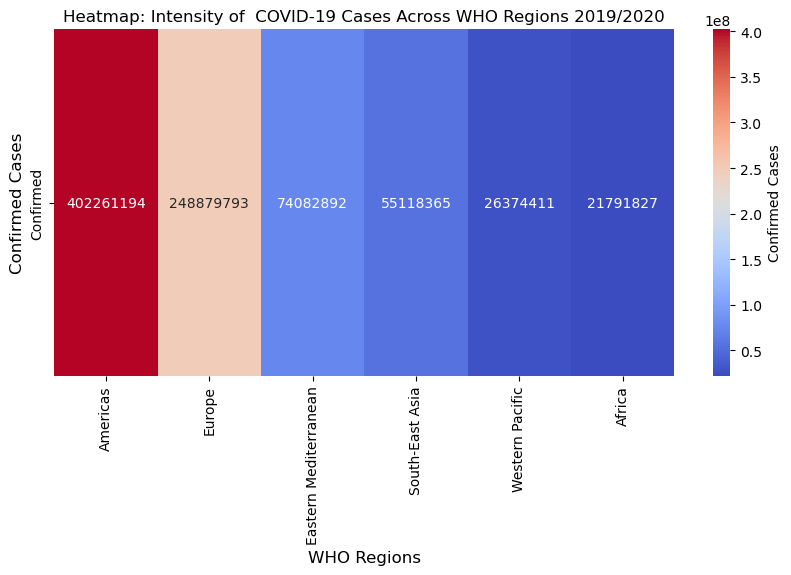

In [70]:
import seaborn as sns

# Aggregate confirmed cases by WHO Region
region_case_count = df.groupby('WHO Region')['Confirmed'].sum().reset_index()

# Set up the heatmap data - here it's a simple DataFrame of region vs confirmed cases
region_case_count = region_case_count.sort_values('Confirmed', ascending=False)

# Plot heatmap
plt.figure(figsize=(10, 4.5))
sns.heatmap(region_case_count.set_index('WHO Region').T, annot=True, cmap='coolwarm', fmt='.0f', cbar_kws={'label': 'Confirmed Cases'})

# Add title and labels
plt.title('Heatmap: Intensity of  COVID-19 Cases Across WHO Regions 2019/2020', fontsize=12)
plt.xlabel('WHO Regions', fontsize=12)
plt.ylabel('Confirmed Cases', fontsize=12)
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')  # Save as a PNG file
plt.show()


MODEL TRAINING AND PREDICTIONS

In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Features and target
df['High_Risk'] = (df['Confirmed'] > df['Confirmed'].median()).astype(int)
X = df[['Active', 'Deaths', 'Recovered']]
y = df['High_Risk']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')  # Save as a PNG file
plt.show()


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4912
           1       1.00      1.00      1.00      4902

    accuracy                           1.00      9814
   macro avg       1.00      1.00      1.00      9814
weighted avg       1.00      1.00      1.00      9814



<Figure size 640x480 with 0 Axes>

In [30]:
''' This a bit ambigious so to understand these result better we can test the model accuracy'''

' This a bit ambigious so to understand these result better we can test the model accuracy'

In [31]:
from sklearn.metrics import accuracy_score

# Assuming you already have:
# - y_test: The true labels from the test dataset
# - y_pred: The predictions made by the model on the test dataset

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 99.92%


C:\Users\DELL\AppData\Local\Temp\ipykernel_3144\2571850990.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['WHO Region'], y=df['High_Risk'], ci=None)


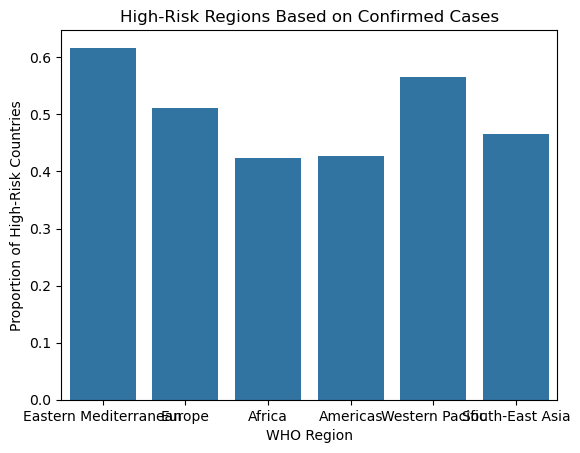

In [32]:

sns.barplot(x=df['WHO Region'], y=df['High_Risk'], ci=None)
plt.title('High-Risk Regions Based on Confirmed Cases')
plt.ylabel('Proportion of High-Risk Countries')
plt.xlabel('WHO Region')
plt.savefig('chart_name.png', dpi=300, bbox_inches='tight')  # Save as a PNG file
plt.show()


C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

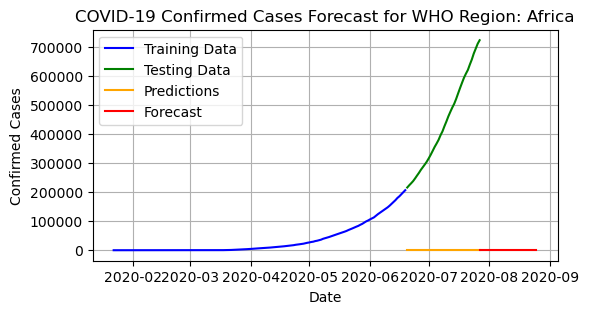

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


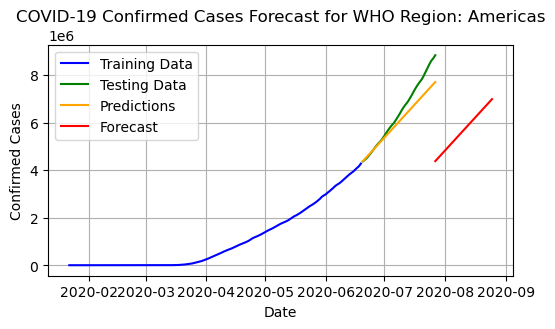

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


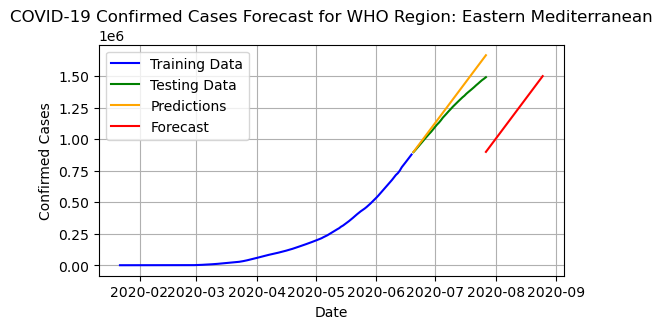

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


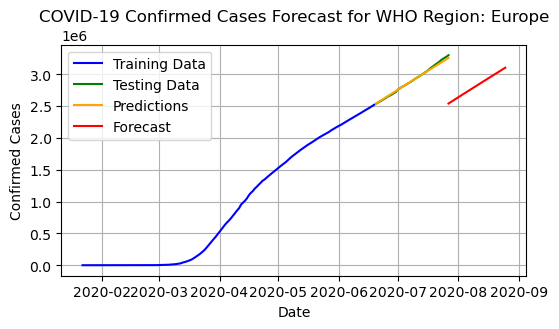

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters fo

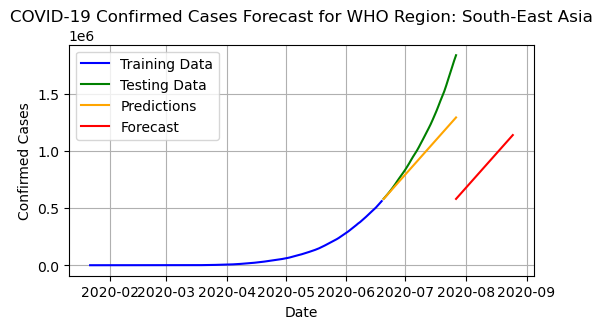

C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\DELL\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


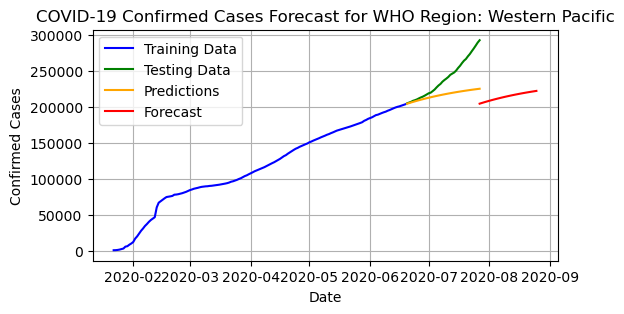

RMSE Results for each WHO Region:
Africa: 465557.29
Americas: 530996.30
Eastern Mediterranean: 83785.28
Europe: 18115.08
South-East Asia: 231678.51
Western Pacific: 31001.11


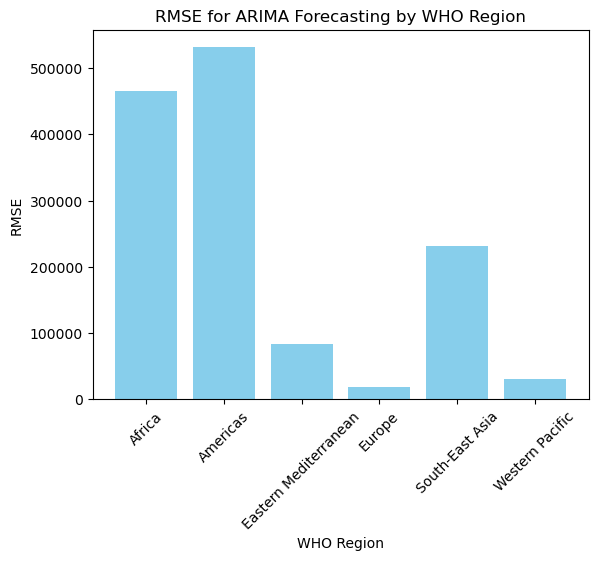


Forecasted Vulnerabilities for Each WHO Region (Next 30 Days):
Africa:
2020-06-20    0.0
2020-06-21    0.0
2020-06-22    0.0
2020-06-23    0.0
2020-06-24    0.0
2020-06-25    0.0
2020-06-26    0.0
2020-06-27    0.0
2020-06-28    0.0
2020-06-29    0.0
2020-06-30    0.0
2020-07-01    0.0
2020-07-02    0.0
2020-07-03    0.0
2020-07-04    0.0
2020-07-05    0.0
2020-07-06    0.0
2020-07-07    0.0
2020-07-08    0.0
2020-07-09    0.0
2020-07-10    0.0
2020-07-11    0.0
2020-07-12    0.0
2020-07-13    0.0
2020-07-14    0.0
2020-07-15    0.0
2020-07-16    0.0
2020-07-17    0.0
2020-07-18    0.0
2020-07-19    0.0
Freq: D, Name: predicted_mean, dtype: float64
Americas:
2020-06-20    4.381170e+06
2020-06-21    4.468370e+06
2020-06-22    4.559136e+06
2020-06-23    4.649073e+06
2020-06-24    4.739202e+06
2020-06-25    4.829287e+06
2020-06-26    4.919382e+06
2020-06-27    5.009474e+06
2020-06-28    5.099567e+06
2020-06-29    5.189660e+06
2020-06-30    5.279753e+06
2020-07-01    5.369846e+06
2020-07-

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Preprocessing data
# Assuming `df` is your dataset
df['Date'] = pd.to_datetime(df['Date'])
regional_data = df.groupby(['WHO Region', 'Date']).sum().reset_index()

# Function to train and forecast for each WHO region
forecast_results = {}
rmse_results = {}

for region_name in regional_data['WHO Region'].unique():
    # Filter data for the region
    region_data = regional_data[regional_data['WHO Region'] == region_name].set_index('Date')['Confirmed']
    
    # Check if sufficient data exists
    if len(region_data) < 10:
        print(f"Insufficient data for WHO Region: {region_name}")
        continue

    # Train-test split
    train_size = int(len(region_data) * 0.8)
    train, test = region_data[:train_size], region_data[train_size:]

    # Fit ARIMA model
    model = ARIMA(train, order=(2, 1, 2))  # Adjust (p, d, q) based on ACF/PACF analysis
    model_fit = model.fit()

    # Forecast on the test set
    predictions = model_fit.forecast(steps=len(test))
    
    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, predictions))
    rmse_results[region_name] = rmse

    # Forecast future outbreaks (e.g., next 30 days)
    forecast = model_fit.forecast(steps=30)
    forecast_results[region_name] = forecast

    # Visualization
    plt.figure(figsize=(6, 3))
    plt.plot(train, label='Training Data', color='blue')
    plt.plot(test, label='Testing Data', color='green')
    plt.plot(test.index, predictions, label='Predictions', color='orange')
    plt.plot(pd.date_range(test.index[-1], periods=30, freq='D'), forecast, label='Forecast', color='red')
    plt.title(f'COVID-19 Confirmed Cases Forecast for WHO Region: {region_name}')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.legend()
    plt.grid()
    plt.show()

# Summarize RMSE results
print("RMSE Results for each WHO Region:")
for region, error in rmse_results.items():
    print(f"{region}: {error:.2f}")

# Visualize RMSE
plt.bar(rmse_results.keys(), rmse_results.values(), color='skyblue')
plt.title("RMSE for ARIMA Forecasting by WHO Region")
plt.xlabel("WHO Region")
plt.ylabel("RMSE")
plt.xticks(rotation=45)
plt.show()

# Final Output: Forecasted Vulnerabilities
print("\nForecasted Vulnerabilities for Each WHO Region (Next 30 Days):")
for region, forecast in forecast_results.items():
    print(f"{region}:")
    print(forecast)
